# Embeddings with Mutiple Output Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
N = 10_000
n_tokens = 5
x = np.random.choice(n_tokens, N)
token_effect = np.linspace(start=-20, stop=20, num=n_tokens)
token_effect_aux = np.linspace(start=-3, stop=3, num=n_tokens)
y = np.random.normal(token_effect[x], scale=2, size=N)
y_aux = np.random.binomial(1, 0.5, N)

In [42]:
inputs = keras.Input(shape=(1), name='input')

em = layers.Embedding(input_dim = n_tokens, output_dim = 4, input_length=1)(inputs)
em = layers.Dense(units=10, activation='linear')(em)

l = layers.Dense(units=8, activation='linear')(em)
l = layers.Dense(units=6, activation='linear')(l)
l = layers.Dense(units=4, activation='linear')(l)
output = layers.Dense(units=1, activation='linear', name='output')(l)

l_aux = layers.Dense(units=8, activation='linear')(em)
l_aux = layers.Dense(units=6, activation='linear')(l_aux)
l_aux = layers.Dense(units=4, activation='linear')(l_aux)
output_aux = layers.Dense(units=1, activation='sigmoid', name='output_aux')(l_aux)

model = keras.Model(inputs=inputs, outputs=[output, output_aux])

In [43]:
model.compile(optimizer='rmsprop', loss={'output': 'mse', 'output_aux': 'mse'})

In [44]:
history = model.fit({'input': x}, {'output': y, 'output_aux': y_aux}, epochs=100, batch_size=1000, validation_split=0, verbose=0)

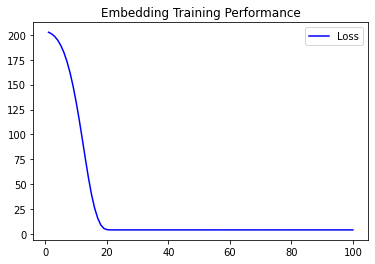

In [49]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color='b', label='Loss')
plt.title('Embedding Training Performance')
plt.legend()
plt.savefig('./img/loss_multi.svg', format='svg')
plt.show()